Add the AIA EIS directory to the PATH

In [1]:
import os

import sys
sys.path.append('./aia_eis/v0/aia_eis_v0')

In [2]:
from a_d.ny_AD import detect as nyImDetect
from a_d.absZ_AD_1 import detect as absZDetect
from a_d.phase_AD_1 import detect as phaseDetect
from data_processor.GOA_preprocessor.goa_data_wrapper import load_Lai_EIS_data
from data_processor.GOA_preprocessor.goa_data_wrapper import load_lai_manual_fitting_res
from IS.IS import IS_0
from goa.integration.goa_intergration import goa_fitter_1
from ml_sl.adaboost.ab_0 import AB
from ml_sl.ml_data_wrapper import split_labeled_dataset_list
from utils.file_utils.dataset_reader_pack.ml_dataset_reader import get_TV_T_dataset, get_T_V_T_dataset
from playground.laiZhaoGui.getLaiVogitAddC import getLaiVogitAddCResDict

In [4]:
label_list = [2, 4, 5, 6, 7, 8, 9]
# Import ml-dataset (Training, validation, Test)
ml_dataset_pickle_file_path = './aia_eis/v0/aia_eis_v0/datasets/ml_datasets/normed'
tr_dataset, va_dataset, te_dataset = get_T_V_T_dataset(file_path=ml_dataset_pickle_file_path)
ml_dataset = tr_dataset + va_dataset + te_dataset
ml_label_list, ml_data_list = split_labeled_dataset_list(ml_dataset)

Structure of data

In [5]:
import numpy as np
import matplotlib.pyplot as plt

**tr_dataset** has the following structure:
```py
[label number, points list]
[1, [(x0, y0), (x1, y1), (x2, y2), ..., (xn-2, yn-2), (xn-1, yn-1)]]
[3, [(x0, y0), (x1, y1), (x2, y2), ..., (xn-2, yn-2), (xn-1, yn-1)]]
[4, [(x0, y0), (x1, y1), (x2, y2), ..., (xn-2, yn-2), (xn-1, yn-1)]]
```

Where points list are **assumed** to be the values of the impedance.

Next code assumes $x_{i} = \mathbb{Re} \{ Z \}$ and $y_{i} = \mathbb{Im} \{ Z \}$


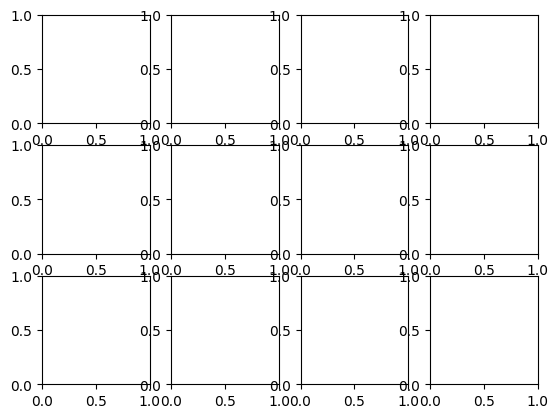

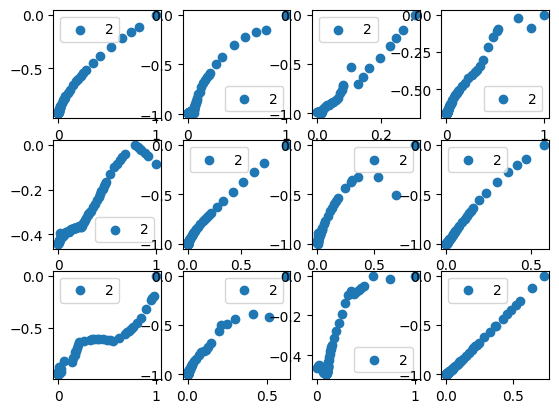

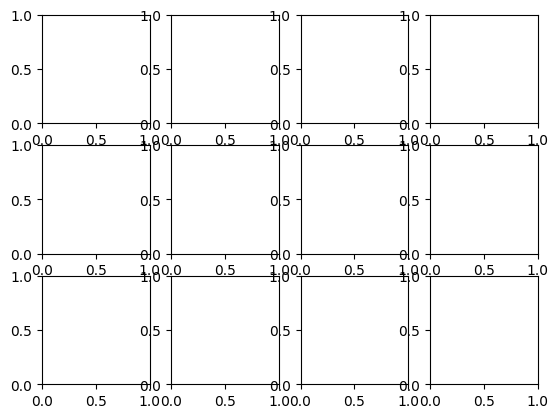

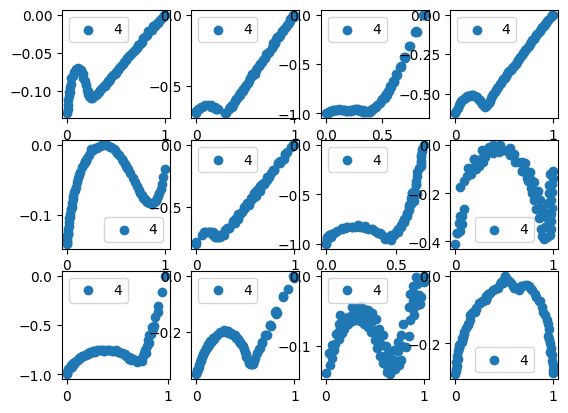

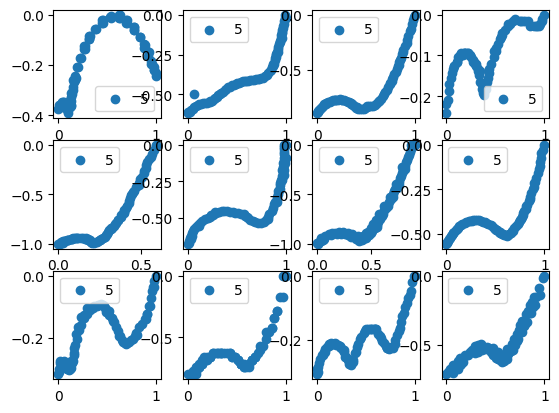

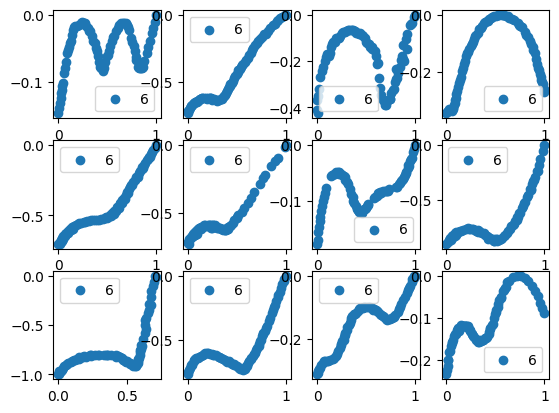

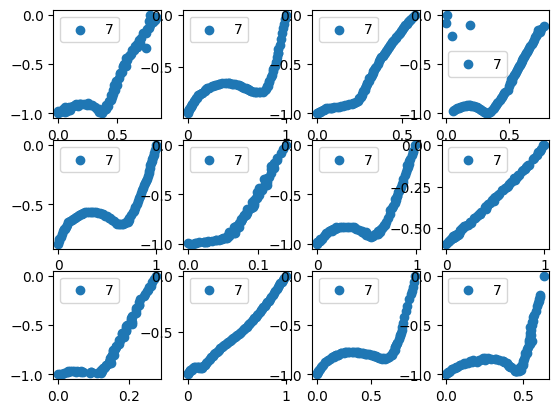

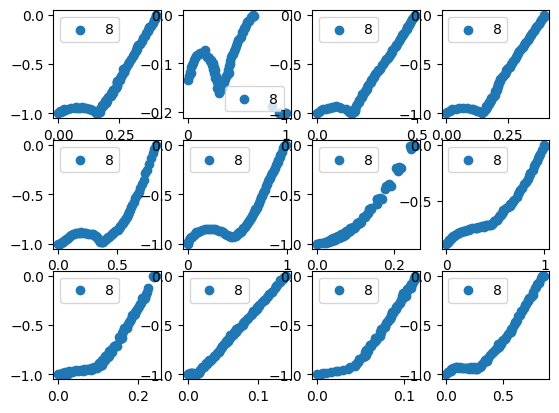

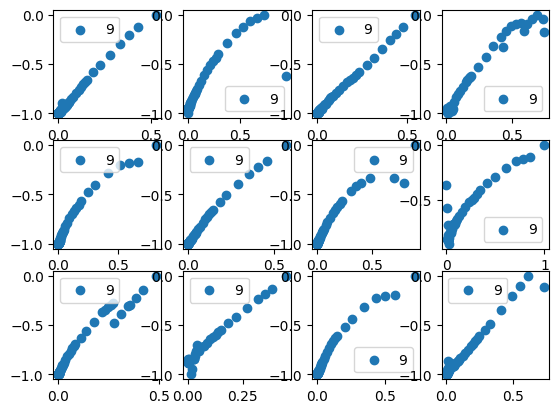

In [7]:
already = []
n_times_per_label = [11]*9

fig_objs=[]
axs_objs=[]
for i in range(9):
    fig, axs = plt.subplots(3,4)
    fig_objs.append(fig)
    axs_objs.append(axs)

for i in range(len(tr_dataset)):
    if tr_dataset[i][0] in already and n_times_per_label[tr_dataset[i][0]-1] < 0:
        continue

    example_1 = np.asarray(tr_dataset[i][1])
    #plt.scatter(example_1[:, 0], -example_1[:, 1])
    #plt.legend(f"{tr_dataset[i][0]}")
    #plt.show()
    row_idx, col_idx = np.unravel_index(n_times_per_label[tr_dataset[i][0]-1], (3,4))
    axs_objs[tr_dataset[i][0]-1][row_idx, col_idx].scatter(example_1[:, 0], -example_1[:, 1])
    axs_objs[tr_dataset[i][0]-1][row_idx, col_idx].legend(f"{tr_dataset[i][0]}")

    already.append(tr_dataset[i][0])
    n_times_per_label[tr_dataset[i][0]-1] = n_times_per_label[tr_dataset[i][0]-1] - 1

Next code assumes $x_{i} = |Z|$ and $y_{i} = \theta_{Z}$

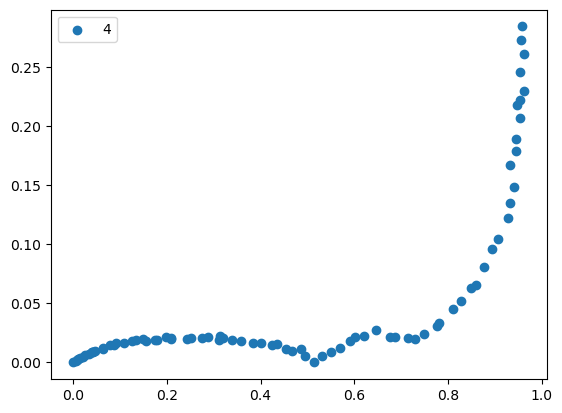

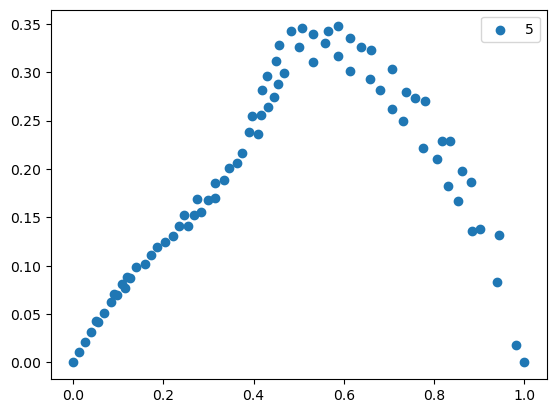

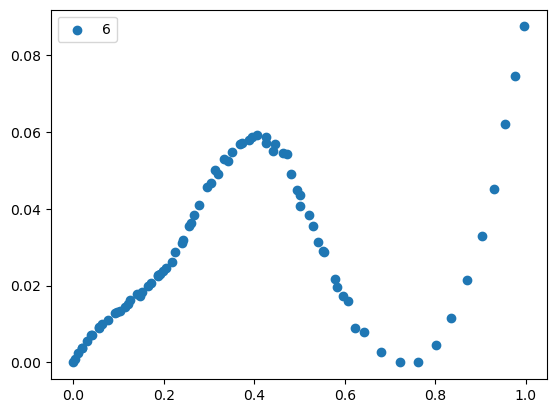

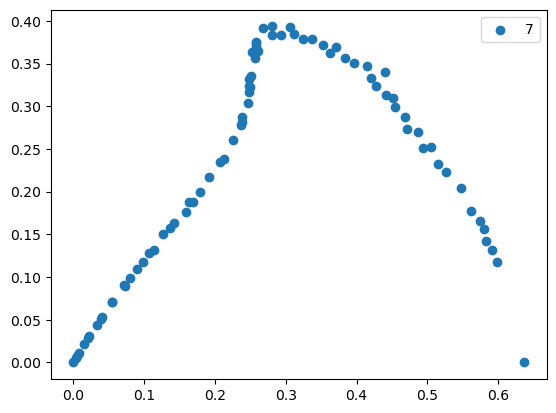

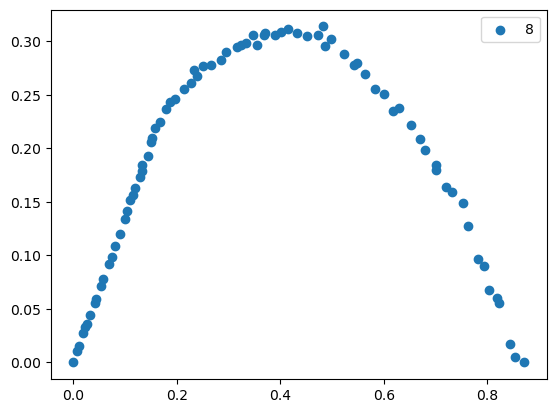

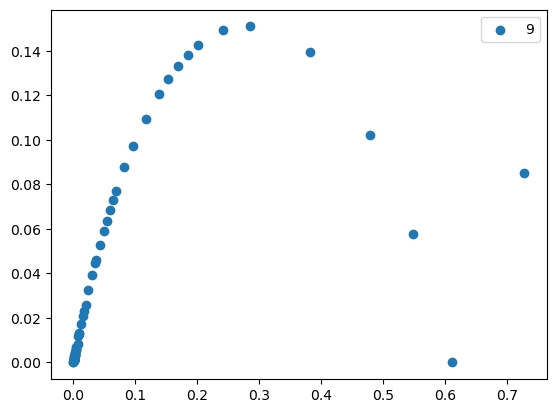

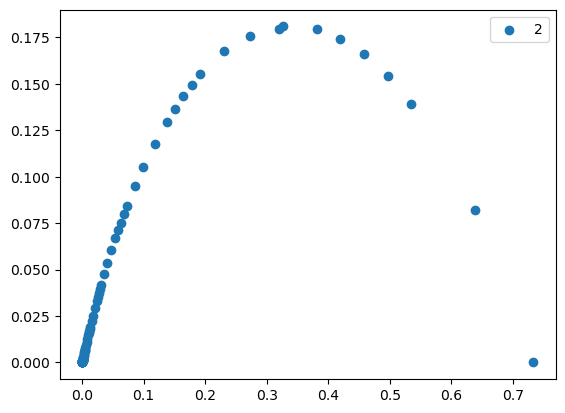

In [16]:
already = []
for i in range(len(tr_dataset)):
    if tr_dataset[i][0] in already:
        continue

    example_1 = np.asarray(tr_dataset[i][1])
    plt.scatter(example_1[:, 0]*np.cos(example_1[:, 1]), example_1[:, 0]*np.sin(example_1[:, 1]))
    plt.legend(f"{tr_dataset[i][0]}")
    plt.show()

    already.append(tr_dataset[i][0])